# Problem Statement

Using statistics and probability techniques, I will identify the differences between customer's browsing habits and shopping patterns. This insights will help the marketing team understand customer engagement on the website.

The marketing team asked to analyze the behavior of online customers during November and December, the busiest months for shoppers.

1. Calculate Purchase Rates: For both returning and new customers during November and December.
2. Identify Strongest Correlation: In total time spent among page types for returning customers.
3. Campaign Impact: Calculate the likelihood of at least 100 sales out of 500 online shopping sessions for returning customers, given a 15% boost in the purchase rate.

**Purchase Rates Hypothesis**:
   **Hypothesis**: Returning customers have a higher purchase rate than new customers during November and December.
   - **Null Hypothesis (H₀)**: The purchase rate of returning customers is **equal to or less** than that of new customers.
   - **Alternative Hypothesis (H₁)**: The purchase rate of returning customers is **higher** than that of new 

   This hypothesis can be tested using a **proportion test** to compare the purchase rates between the two customer types.

**Purchase Rates**: Do returning customers have a higher purchase rate than new customers?

# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load and preview data

In [2]:
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


## Calculate the online purchase rates during online shopping sessions by customer type for November and December.
# Subset dataframe for November and December data

In [3]:
shopping_Nov_Dec = shopping_data[shopping_data['Month'].isin(['Nov', 'Dec'])]
shopping_Nov_Dec.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
5463,5464,1,39.2,2,120.8,7,80.500000,0.000000,0.010000,0.000000,0.0,True,Nov,New_Customer,0.0
5464,5465,3,89.6,0,0.0,57,1721.906667,0.000000,0.005932,204.007949,0.0,True,Nov,Returning_Customer,1.0
5467,5468,4,204.2,0,0.0,31,652.376667,0.012121,0.016162,0.000000,0.0,False,Nov,Returning_Customer,0.0
5479,5480,0,0.0,0,0.0,13,710.066667,0.000000,0.007692,72.522838,0.0,False,Nov,Returning_Customer,1.0
5494,5495,0,0.0,0,0.0,24,968.692424,0.000000,0.000000,106.252517,0.0,False,Nov,Returning_Customer,1.0


In [5]:
# Make sure we only have November and December data
print(shopping_Nov_Dec['Month'].unique())

['Nov' 'Dec']


# Get session frequency stats by CustomerType and Purchase

In [6]:
count_session = shopping_Nov_Dec.groupby(['CustomerType'])['Purchase'].value_counts()
print(count_session)

CustomerType        Purchase
New_Customer        0.0          529
                    1.0          199
Returning_Customer  0.0         2994
                    1.0          728
Name: count, dtype: int64


# Total number of session by CustomerType

In [9]:
total_new_customer = np.sum(count_session['New_Customer'])
total_returning_customer = np.sum(count_session['Returning_Customer'])
print(f'Total New Customer: {total_new_customer}')
print(f'Total Returning Customer: {total_returning_customer}')

Total New Customer: 728
Total Returning Customer: 3722


# Total number of purchase by CustomerType

In [10]:
purchase_new_customer = count_session[('New_Customer', 1)]
purchase_returning_customer = count_session[('Returning_Customer', 1)]
print(f'Purchase by New Customer: {purchase_new_customer}')
print(f'Purchase by Returning Customer: {purchase_returning_customer}')

Purchase by New Customer: 199
Purchase by Returning Customer: 728


# Calculate purchase rates

In [11]:
purchase_rate_new = purchase_new_customer / total_new_customer
purchase_rate_returning = purchase_returning_customer / total_returning_customer

In [12]:
purchase_rates = {"Returning_Customer": purchase_rate_returning, "New_Customer": purchase_rate_new}
print(purchase_rates)

{'Returning_Customer': 0.1955937667920473, 'New_Customer': 0.2733516483516483}


### **Therefore, the online purchase for the returning customers is lower than that of the new customers.**

# Identify the strongest correlation in total time spent between different types of pages visited by the returning customers during the months of November and December. 

In [13]:
# Calculate correlation with pandas
cor_admin_info = shopping_Nov_Dec['Administrative_Duration'].corr(shopping_Nov_Dec['Informational_Duration'])
cor_admin_product = shopping_Nov_Dec['Administrative_Duration'].corr(shopping_Nov_Dec['ProductRelated_Duration'])
cor_product_info = shopping_Nov_Dec['ProductRelated_Duration'].corr(shopping_Nov_Dec['Informational_Duration'])

print(cor_admin_info)
print(cor_admin_product)
print(cor_product_info)

0.24468855792839267
0.3898546003206963
0.36712552534442133


In [15]:
# Another way to solve this is to use Scipy pearsonr function
cor_admin_info = stats.pearsonr(shopping_Nov_Dec['Administrative_Duration'], shopping_Nov_Dec['Informational_Duration'])
cor_admin_info

PearsonRResult(statistic=0.24468855792839247, pvalue=1.1351596218133696e-61)

The value 0.2447 indicates a weak positive linear correlation between the two variables. This means that as `Administrative_Duration` increases, `Informational_Duration` tends to increase slightly as well, but the relationship is not strong.

- The p-value here is 1.1351596218133696e-61, which is an extremely small number (close to zero).
- The p-value tests the null hypothesis that there is no correlation between the two variables.
- A p-value this small indicates that the correlation is statistically significant, meaning it’s highly unlikely that this observed correlation is due to random chance.

In [16]:
# Another way to solve this is to use Pandas correlation matrix
shopping_Nov_Dec[['Administrative_Duration','Informational_Duration','ProductRelated_Duration' ]].corr()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration
Administrative_Duration,1.000000,0.244689,0.389855
Informational_Duration,0.244689,1.000000,0.367126
ProductRelated_Duration,0.389855,0.367126,1.000000


In [17]:
# Store top correlation
top_correlation = {"pair": ('Administrative_Duration', 'ProductRelated_Duration'), "correlation": cor_admin_product}
print(top_correlation)

{'pair': ('Administrative_Duration', 'ProductRelated_Duration'), 'correlation': 0.3898546003206963}


## A new campaign for the returning customers will boost the purchase rate by 15%. 
## What is the likelihood of achieving at least 100 sales out of 500 online shopping sessions for the returning customers?

### Purchase is a binomial random variable taking the value of either 0 or 1
### We know that the current purchase rate for the returning customers is

In [23]:
print("Current purchase rate for the returning customer:", purchase_rate_returning)

Current purchase rate for the returning customer: 0.1955937667920473


# 15% Increase in this rate would be

In [ ]:
increased_purchase_rate_returning = 1.15 * purchase_rate_returning
print("Increased purchase rate for the returning customer:", increased_purchase_rate_returning)

# First, we find the likelihood of having <100 sales of 500 sessions
# We can find this from binomial cdf

In [20]:
prob_sales_100_less = stats.binom.cdf(k=100, n=500, p=increased_purchase_rate_returning)
print("probability of having <100 sales:", prob_sales_100_less)

probability of having <100 sales: 0.09877786609627338


 The result, approximately 0.0988, indicates that the probability of having fewer than 100 sales (out of 500 opportunities) is around 9.88%. This suggests that, given the assumed probability of a successful sale (p=increased_purchase_rate_returning), it’s relatively unlikely to see fewer than 100 sales.

# Then, to find the probability of having 100 or more sales is 1-prob_sales_100_less

In [21]:
prob_at_least_100_sales = 1 - prob_sales_100_less
print("probability of having at least 100 sales:", prob_at_least_100_sales)

probability of having at least 100 sales: 0.9012221339037266


- The **probability of having at least 100 sales** is approximately **90.12%**. This indicates a high likelihood of meeting or exceeding 100 sales, based on the parameters you're working with (500 trials and the given probability of success).
  
- This can give confidence to stakeholders that in most scenarios (about 90% of the time), the number of sales will be 100 or more, making it a reliable target.

# Plotting the binomial probability distribution

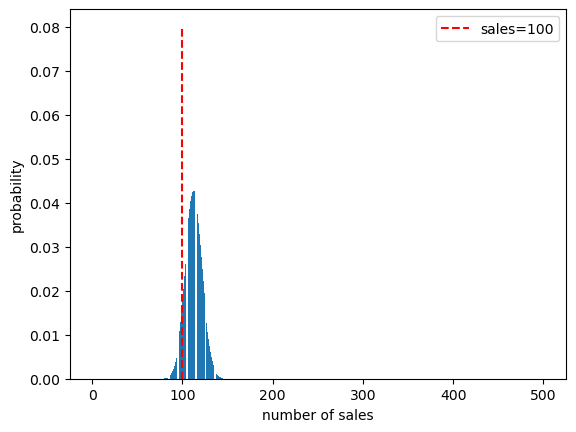

In [22]:
n_sessions = 500
k_values = np.arange(500) + 1
p_binom_values = [stats.binom.pmf(k, n_sessions, increased_purchase_rate_returning) for k in k_values ] 
plt.bar(k_values, p_binom_values) 
plt.vlines(100, 0, 0.08, color='r', linestyle='dashed', label="sales=100")
plt.xlabel("number of sales")
plt.ylabel("probability")
plt.legend()
plt.show()

**The number of sales is most likely to be around 100, as shown by the peak in the distribution and the red dashed line highlighting this value. For planning purposes, the business can expect that future sales will likely be close to 100. This could help in resource allocation, inventory management, and setting realistic sales targets.**